In [2]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [3]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Sat Aug  8 22:00:53 2020

@author: hilal
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os import listdir
from keras.preprocessing import sequence
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization
from keras.layers import LSTM

from keras.models import load_model
from keras.callbacks import ModelCheckpoint
import glob

from sklearn.preprocessing import MinMaxScaler
# ignore warnings
import warnings
warnings.simplefilter(action='ignore')
path = '/content/drive/My Drive/Colab Notebooks/Tests/'

testdir = glob.glob(path+"*/")


In [4]:

targets=list()
sequences = list()

for i in range(0,len(testdir)):
    adlFallTest= glob.glob(testdir[i]+"Testler Export/" +"*/")
    for j in range(0, len(adlFallTest)):
            tests= glob.glob(adlFallTest[j]+"*/")
            for k in range(0,len(tests)):
                file_path= tests[k]+ '340537.txt'
                df = pd.read_csv(file_path, header=4, delimiter='\t')
                df.drop(columns=["Unnamed: 23","Counter", "Temperature","Pressure"], inplace=True)
                df.dropna(inplace = True)
                values = df.values
                if len(df)>0:
                    sequences.append(values)
                    if adlFallTest[j][65]=="8":
                        targets.append(0)
                    else:
                        targets.append(1)
                    

import random
random.Random(3).shuffle(targets)       
random.Random(3).shuffle(sequences)
                         
group2 = np.full((2214, 1), 2) #train
group3=np.full((553, 1), 3) #test
group1=np.full((553, 1), 1) #validation
groups = np.concatenate((group2,group3,group1), axis=0)
    
len_sequences=[]
for one_sequence in sequences:
  len_sequences.append(len(one_sequence))
pd.Series(len_sequences).describe()

to_pad = 950
new_seq = []
for one_seq in sequences:
    len_one_seq = len(one_seq)
    last_val = one_seq[-1]
    n = to_pad - len_one_seq
    to_concat = np.repeat(one_seq[-1], n).reshape(20, n).transpose() # ilk iki sütunu silmem gerek
    new_one_seq = np.concatenate([one_seq, to_concat])
    new_seq.append(new_one_seq)
final_seq = np.stack(new_seq)

seq_len = 945
final_seq=sequence.pad_sequences(final_seq, maxlen=seq_len, padding='post', dtype='float', truncating='post')


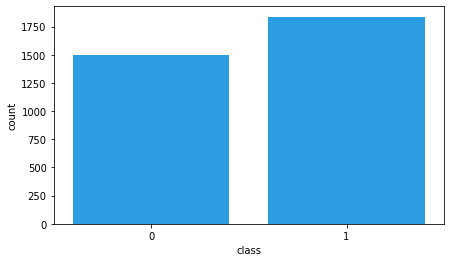

In [5]:
import seaborn as sns

import matplotlib.pyplot as plt
#plt.hist(targets)
plt.figure(figsize=(7,4))
#plt.title('Distribution of ADL and FALL')
plt.xlabel('class')
plt.ylabel('Count')

sns.countplot(targets, color="#0FA5FF")
plt.savefig('/content/drive/My Drive/Colab Notebooks/newhist.png', format='png', dpi=100)
plt.show()

In [6]:
file_path

'/content/drive/My Drive/Colab Notebooks/Tests/206/Testler Export/802-YurumeGeri/Test_2/340537.txt'

In [8]:
len_sequences=[]
for one_sequence in sequences:
  len_sequences.append(len(one_sequence))
pd.Series(len_sequences).describe()

count    3335.000000
mean      480.199100
std        97.116044
min        68.000000
25%       412.000000
50%       458.000000
75%       531.000000
max       945.000000
dtype: float64

In [9]:
adl=list()
fall=list()
for i in targets:
  if targets[i]==0:
    adl.append(targets[i])
  else:
    fall.append(targets[i])

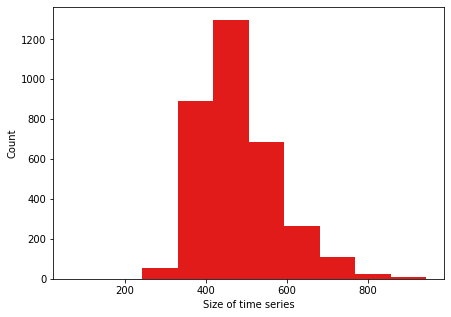

In [10]:
import seaborn as sns

import matplotlib.pyplot as plt
plt.figure(figsize=(7,5))
#plt.title('Distribution of ADL and FALL')
plt.xlabel('Size of time series')
plt.ylabel('Count')
#sns.countplot(adl)
plt.hist(len_sequences, color= "#E11A1A")
plt.savefig('/content/drive/My Drive/Colab Notebooks/hist3.png', format='png', dpi=100)
plt.show()

In [11]:

df_adl=pd.read_csv('/content/drive/My Drive/Colab Notebooks/Tests/206/Testler Export/803-TempoluYavasKosu/Test_2/340537.txt',header=4, delimiter='\t')
df_fall=pd.read_csv('/content/drive/My Drive/Colab Notebooks/Tests/206/Testler Export/917-YataktanDusme/Test_2/340537.txt',header=4, delimiter='\t')
df_adl.tail()

,Counter,Temperature,VelInc_X,VelInc_Y,VelInc_Z,OriInc_w,OriInc_x,OriInc_y,OriInc_z,Acc_X,Acc_Y,Acc_Z,Gyr_X,Gyr_Y,Gyr_Z,Mag_X,Mag_Y,Mag_Z,Pressure,Roll,Pitch,Yaw,RSSI,Unnamed: 23
500,29357,0,0.387878,-0.018494,0.054993,0.999999,-0.000328,0.000127,0.000259,9.696960,-0.462341,1.374817,-0.016403,0.006342,0.012970,-1.055664,0.202148,0.772949,878.02,-16.114979,-81.998115,-140.524144,-39.0,NaN
501,29358,0,0.389319,-0.018915,0.054162,0.999999,-0.000507,0.000263,0.000191,9.732985,-0.472879,1.354051,-0.025368,0.013161,0.009537,-1.053223,0.201904,0.770020,878.00,-16.233873,-81.954245,-140.462654,-39.0,NaN
502,29359,0,0.391663,-0.020020,0.053406,0.999999,-0.000217,0.000085,0.000168,9.791565,-0.500488,1.335144,-0.010872,0.004244,0.008392,-1.053223,0.199707,0.770264,878.06,-16.341268,-81.930880,-140.379831,-39.0,NaN
503,29360,0,0.389022,-0.018892,0.054317,0.999999,-0.000180,0.000086,0.000183,9.725547,-0.472307,1.357913,-0.009012,0.004292,0.009155,-1.053467,0.201904,0.775879,878.06,-16.454791,-81.907019,-140.286249,-39.0,NaN
504,29361,0,0.387695,-0.018311,0.055542,0.999999,-0.000359,0.000066,0.000259,9.692383,-0.457764,1.388550,-0.017929,0.003290,0.012970,-1.055664,0.201904,0.770264,878.02,-16.650457,-81.882901,-140.129852,-39.0,NaN


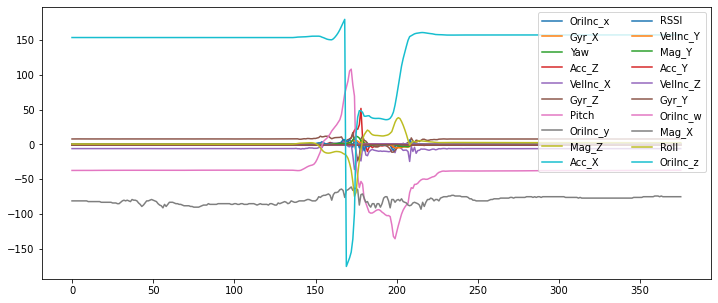

In [12]:
f,ax = plt.subplots(figsize=(12, 5))


df_fall.VelInc_X.plot()
df_fall.VelInc_Y.plot()
df_fall.VelInc_Z.plot()
df_fall.Acc_X.plot()
df_fall.Acc_Y.plot()
df_fall.Acc_Z.plot()
df_fall.OriInc_x.plot()
df_fall.OriInc_y.plot()
df_fall.OriInc_w.plot()
df_fall.OriInc_z.plot()
df_fall.Gyr_X.plot()
df_fall.Gyr_Y.plot()
df_fall.Gyr_Z.plot()
df_fall.Mag_X.plot()
df_fall.Mag_Y.plot()
df_fall.Mag_Z.plot()
#df_fall.Pressure.plot()
df_fall.Roll.plot()
df_fall.RSSI.plot()
df_fall.Pitch.plot()
df_fall.Yaw.plot()
plt.legend({'VelInc_X','VelInc_Y','VelInc_Z','Acc_X','Acc_Y','Acc_Z','OriInc_x','OriInc_y','OriInc_z','OriInc_w','Gyr_X','Gyr_Y','Gyr_Z','Mag_X','Mag_Y','Mag_Z','Roll','RSSI','Pitch','Yaw'}, ncol=2, loc="top")
plt.savefig('/content/drive/My Drive/Colab Notebooks/FALL.png', format='png', dpi=300)


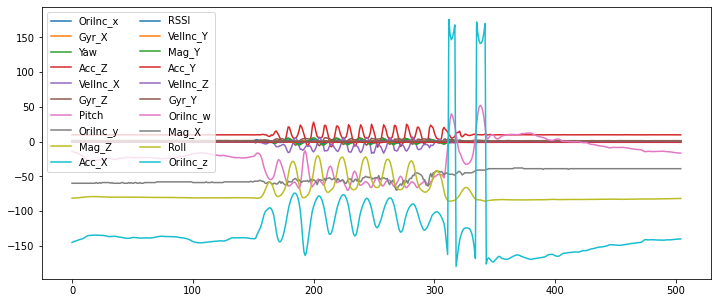

In [13]:
f,ax = plt.subplots(figsize=(12, 5))


df_adl.VelInc_X.plot()
df_adl.VelInc_Y.plot()
df_adl.VelInc_Z.plot()
df_adl.Acc_X.plot()
df_adl.Acc_Y.plot()
df_adl.Acc_Z.plot()
df_adl.OriInc_x.plot()
df_adl.OriInc_y.plot()
df_adl.OriInc_w.plot()
df_adl.OriInc_z.plot()
df_adl.Gyr_X.plot()
df_adl.Gyr_Y.plot()
df_adl.Gyr_Z.plot()
df_adl.Mag_X.plot()
df_adl.Mag_Y.plot()
df_adl.Mag_Z.plot()
#df_adl.Pressure.plot()
df_adl.Roll.plot()
df_adl.RSSI.plot()
df_adl.Pitch.plot()
df_adl.Yaw.plot()
plt.legend({'VelInc_X','VelInc_Y','VelInc_Z','Acc_X','Acc_Y','Acc_Z','OriInc_x','OriInc_y','OriInc_z','OriInc_w','Gyr_X','Gyr_Y','Gyr_Z','Mag_X','Mag_Y','Mag_Z','Roll','RSSI','Pitch','Yaw'}, ncol=2, loc="top")
plt.savefig('/content/drive/My Drive/Colab Notebooks/ADL.png', format='png', dpi=300)

In [14]:
train = [final_seq[i] for i in range(len(groups)) if (groups[i]==2)]
validation = [final_seq[i] for i in range(len(groups)) if groups[i]==1]
test = [final_seq[i] for i in range(len(groups)) if groups[i]==3]


train_target = [targets[i] for i in range(len(groups)) if (groups[i]==2)]
validation_target = [targets[i] for i in range(len(groups)) if groups[i]==1]
test_target = [targets[i] for i in range(len(groups)) if groups[i]==3]

train = np.array(train)
validation = np.array(validation)
test = np.array(test)


train_target = np.array(train_target)


validation_target = np.array(validation_target)


test_target = np.array(test_target)




In [15]:
from pandas import read_csv
from pandas import DataFrame
from pandas import Grouper
from matplotlib import pyplot
#series = read_csv('daily-minimum-temperatures.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
series=pd.read_csv('/content/drive/My Drive/Colab Notebooks/Tests/206/Testler Export/803-TempoluYavasKosu/Test_2/340537.txt',header=4, delimiter='\t',index_col=0, parse_dates=True, squeeze=True)


In [ ]:
from keras.layers import Dropout
import tensorflow as tf


model = Sequential()
model.add(LSTM(128, input_shape=(seq_len, 20)))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Dense(30, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1, activation='sigmoid'))
model.summary()
adam = tf.keras.optimizers.Adam(lr=0.001)
chk = ModelCheckpoint('best_model.pkl', monitor='val_acc', save_best_only=True, mode='max', verbose=1)
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
history = model.fit(train, train_target, epochs=100, batch_size=100, callbacks=[chk], validation_data=(validation,validation_target))



#loading the model and checking accuracy on the test data
#model = load_model('best_model1.pkl')

from sklearn.metrics import accuracy_score
test_preds = model.predict_classes(test)
print("başarım", accuracy_score(test_target, test_preds))




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               76288     
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 30)                3870      
                                                                 
 batch_normalization_1 (Batc  (None, 30)               120       
 hNormalization)                                                 
                                                                 
 dense_1 (Dense)             (None, 1)                 3

In [ ]:
model.summary()

In [ ]:
tf.keras.utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=False,
    show_layer_names=False,
    rankdir="TB",
    expand_nested=False,
    dpi=100,
)

In [ ]:
from sklearn.metrics import accuracy_score
test_preds = model.predict_classes(test)
print("başarım", accuracy_score(test_target, test_preds))


In [ ]:
'''from keras.models import load_model
model=load_model('/content/drive/My Drive/Colab Notebooks/modelfalladl.py')'''

In [ ]:
#model.save('/content/drive/My Drive/Colab Notebooks/modelfalladl.py')


In [ ]:
from tensorflow.keras.optimizers import Adam


adam = Adam(lr=0.001)
chk = ModelCheckpoint('best_model.pkl', monitor='val_acc', save_best_only=True, mode='max', verbose=1)
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
history = model.fit(train, train_target, epochs=100, batch_size=100, callbacks=[chk], validation_data=(validation,validation_target))



#loading the model and checking accuracy on the test data
#model = load_model('best_model1.pkl')



In [1]:
from sklearn.metrics import accuracy_score
test_preds = model.predict(test)


In [ ]:
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train','Test'], loc='upper left')

plt.subplot(2,2,1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train','Test'], loc='upper left')
plt.savefig('/content/drive/My Drive/Colab Notebooks/yeni7.png', format='png', dpi=300)

plt.show()
# Do the plot code


In [ ]:
#from sklearn.metrics import confusion_matrix,classification_report

#print(confusion_matrix(test_target,test_preds))
#print(classification_report(test_target,test_preds))

In [ ]:
conf = confusion_matrix(test_target, test_preds)
TP = conf[0,0]
FP = conf[0,1]
TN = conf[1,0]
FN = conf[1,1]

In [ ]:
FP

In [ ]:
TN

In [ ]:
FN

In [ ]:
TP

In [ ]:
def get_roc_curve(y_test, y_proba, delta=0.1):
    """
    Return the True Positive Rates (TPRs), False Positive Rates (FPRs), 
    and the threshold values, seperated by delta.
    """
    thresh = list(np.arange(0, 1, delta)) + [1]
    TPRs = []
    FPRs = []
    y_pred = np.empty(y_proba.shape)
    for th in thresh:
        y_pred[y_proba < th] = 0
        y_pred[y_proba >= th] = 1
        
        # confusion matrix from the function we defined
        (TN, FP), (FN, TP) = confusion_matrix(test_target, test_preds)
        
        TPR = TP / (TP + FN)  # sensitivity
        FPR = FP / (FP + TN)  # 1 - specificity
        TPRs.append(TPR)
        FPRs.append(FPR)
    return FPRs, TPRs, thresh

In [ ]:
delta = 0.001
FPRs, TPRs, _ = get_roc_curve(test_target, test_preds, delta)

In [ ]:
# Plot the ROC curve
plt.plot(FPRs, TPRs, color='red',
         lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label="Mean")
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC curve (threshold delta = {delta})')
plt.legend(loc="lower right")
plt.show()